### Exercise 1: Proving Second Principal Component
### Mathematical Proof:
### Proof that the second principal component in PCA corresponds to the eigenvector with the second largest eigenvalue.
### Proof:

### Initial Setup:


### Let X be our data matrix
### Let Σ be the covariance matrix of X
### Let w₁ be the first principal component
### Let w₂ be the second principal component
### Let λᵢ be the eigenvalues of Σ in descending order (λ₁ ≥ λ₂ ≥ ... ≥ λₙ)


### Optimization Problem for w₂:
### We need to maximize the variance along w₂ subject to:


### Orthogonality to w₁: w₁ᵀw₂ = 0
### Unit norm constraint: w₂ᵀw₂ = 1


### Lagrangian Formulation:
### L(w₂, α, β) = w₂ᵀΣw₂ - α(w₂ᵀw₂ - 1) - βw₂ᵀw₁
### where:


### α and β are Lagrange multipliers
### w₂ᵀΣw₂ is the variance to maximize
### w₂ᵀw₂ = 1 is the unit norm constraint
### w₂ᵀw₁ = 0 is the orthogonality constraint


### First-Order Conditions:
### Take derivative with respect to w₂ and set to zero:
### ∂L/∂w₂ = 2Σw₂ - 2αw₂ - βw₁ = 0
### Multiply by w₁ᵀ:
### w₁ᵀΣw₂ - αw₁ᵀw₂ - βw₁ᵀw₁ = 0
### Using Constraints:


### w₁ᵀw₂ = 0 (orthogonality)
### w₁ᵀw₁ = 1 (unit norm)
### Therefore:
### w₁ᵀΣw₂ = β


### Since w₁ is the first eigenvector:
### Σw₁ = λ₁w₁
### Therefore:
### β = w₁ᵀΣw₂ = (Σw₁)ᵀw₂ = λ₁w₁ᵀw₂ = 0
### Back to First-Order Condition:
### 2Σw₂ - 2αw₂ = 0
### (Σ - αI)w₂ = 0
### Eigenvalue Equation:
### This shows w₂ must be an eigenvector of Σ with eigenvalue α
### Maximum Variance:


### We know w₂ must be orthogonal to w₁
### Among all remaining eigenvectors, we want the one giving maximum variance
### The variance along any eigenvector is its corresponding eigenvalue
### Therefore, w₂ must correspond to the second largest eigenvalue λ₂


### Verification:


### w₂ is an eigenvector of Σ
### w₂ is orthogonal to w₁
### w₂ maximizes variance subject to these constraints
### This is only satisfied by the eigenvector corresponding to λ₂

### Therefore, we have proven that the second principal component w₂ must be the eigenvector corresponding to the second largest eigenvalue λ₂ of the covariance matrix Σ.
### This proof shows that:

### The second principal component must be an eigenvector
### It must be orthogonal to the first principal component
### Among remaining directions, it maximizes variance
### These conditions are only satisfied by the eigenvector corresponding to λ₂

### This proof demonstrates why PCA naturally orders components by variance and why the second principal component corresponds to the second largest eigenvalue.

## Exercise 2: Audio Signal Separation Implementation

### File Setup and Verification:

In [ ]:
# Install required packages
!pip install soundfile
!pip install sounddevice
!pip install scikit-learn
!pip install numpy

In [11]:
import soundfile as sf
import sounddevice as sd
from sklearn.decomposition import FastICA
import numpy as np
import os
import sys

def process_audio_signals():
    try:
        # Read audio files from correct path
        base_path = os.path.join(os.getcwd())  # current working directory
        
        # Read the audio files
        [x1, fs] = sf.read(os.path.join(base_path, 'voice1.wav'))
        [x2, fs] = sf.read(os.path.join(base_path, 'voice2.wav'))
        [x3, fs] = sf.read(os.path.join(base_path, 'music.wav'))

        # Create source matrix
        X = np.array([x1.conj().transpose(), x2.conj().transpose(), x3.conj().transpose()])

        # Print original signals info
        print('Playing original sounds...')
        for i in range(3):
            sig = X[i, :]/np.max(np.abs(X[i, :]))
            sd.play(sig, fs, blocking=True)

        # Generate mixing matrix
        A = np.abs(np.random.rand(3, 3))
        print("\nMixing Matrix:")
        print(A)

        # Create mixtures
        Y = np.dot(A, X)
        print('\nPlaying mixed signals...')
        for i in range(3):
            sig = Y[i, :]/np.max(np.abs(Y[i, :]))
            sd.play(sig, fs, blocking=True)

        # Apply FastICA
        f = FastICA(algorithm='deflation', fun='cube', max_iter=1000)
        ica_signals = f.fit_transform(Y.conj().transpose()).conj().transpose()
        
        print('\nPlaying ICA recovered signals...')
        for i in range(3):
            sig = ica_signals[i, :]/np.max(np.abs(ica_signals[i, :]))
            sd.play(sig, fs, blocking=True)

        # Apply PCA
        U, S, V = np.linalg.svd(np.dot(Y, Y.conj().transpose()))
        pca_signals = np.dot(U.conj().transpose(), Y)

        print('\nPlaying PCA recovered signals...')
        for i in range(3):
            sig = pca_signals[i, :]/np.max(np.abs(pca_signals[i, :]))
            sd.play(sig, fs, blocking=True)

        return {
            'original': X,
            'mixed': Y,
            'ica_recovered': ica_signals,
            'pca_recovered': pca_signals,
            'sampling_rate': fs
        }

    except FileNotFoundError as e:
        print(f"Audio file not found: {str(e)}")
        raise
    except Exception as e:
        print(f"Error during processing: {str(e)}")
        raise

if __name__ == '__main__':
    try:
        results = process_audio_signals()
        
        # Print separation performance analysis
        print("\nPerformance Analysis:")
        print("\nCorrelation between ICA recovered signals:")
        print(np.corrcoef(results['ica_recovered']))
        
        print("\nCorrelation between PCA recovered signals:")
        print(np.corrcoef(results['pca_recovered']))
        
    except Exception as e:
        print(f"Error running analysis: {str(e)}")

Playing original sounds...

Mixing Matrix:
[[5.86248780e-01 1.36206689e-01 8.38563596e-01]
 [1.98443622e-01 3.47915270e-04 4.98254538e-01]
 [3.19706713e-01 9.93889369e-01 5.27579998e-01]]

Playing mixed signals...

Playing ICA recovered signals...

Playing PCA recovered signals...

Performance Analysis:

Correlation between ICA recovered signals:
[[ 1.00000000e+00 -8.35103039e-15  1.60134515e-14]
 [-8.35103039e-15  1.00000000e+00  1.50456354e-14]
 [ 1.60134515e-14  1.50456354e-14  1.00000000e+00]]

Correlation between PCA recovered signals:
[[ 1.00000000e+00 -5.12375823e-08  5.15474773e-08]
 [-5.12375823e-08  1.00000000e+00  1.31229689e-08]
 [ 5.15474773e-08  1.31229689e-08  1.00000000e+00]]


### Interpretation of the above output:

### Mixing Matrix Analysis:

    [[5.86248780e-01 1.36206689e-01 8.38563596e-01]
    [1.98443622e-01 3.47915270e-04 4.98254538e-01]
    [3.19706713e-01 9.93889369e-01 5.27579998e-01]]

Non-uniform mixing with coefficients ranging from ~3.48e-4 to ~0.994
Strong mixing component in position (3,2): 0.994
Relatively balanced distribution in the third column
This creates a complex mixing scenario that tests the separation capabilities


### Performance Analysis by Method:

### ICA Recovered Signals Correlation Matrix:

    [[ 1.00000000e+00 -8.35103039e-15  1.60134515e-14]
    [-8.35103039e-15  1.00000000e+00  1.50456354e-14]
    [ 1.60134515e-14  1.50456354e-14  1.00000000e+00]]

Key Observations:

Perfect diagonal elements (1.0): indicates successful separation
Off-diagonal elements ≈ 10⁻¹⁴-10⁻¹⁵: extremely low cross-correlation
Symmetrical matrix structure: suggests stable separation
Very high independence achieved between recovered signals

### PCA Recovered Signals Correlation Matrix:

    [[ 1.00000000e+00 -5.12375823e-08  5.15474773e-08]
    [-5.12375823e-08  1.00000000e+00  1.31229689e-08]
    [ 5.15474773e-08  1.31229689e-08  1.00000000e+00]]

Key Observations:

Perfect diagonal elements (1.0)
Off-diagonal elements ≈ 10⁻⁸: low but higher than ICA
Less independence between components compared to ICA
Still achieved good separation but not as effective as ICA


### Comparative Analysis:

ICA vs PCA Performance:

Independence Quality:

ICA: 10⁻¹⁴-10⁻¹⁵ cross-correlation
PCA: 10⁻⁸ cross-correlation
ICA achieves ~10⁶ times better independence


### Separation Effectiveness:

ICA shows superior separation capability
PCA shows good but lesser separation
Both methods successfully recover distinct signals


### Technical Implications:
### Signal Independence:

ICA optimization for independence is clearly demonstrated
PCA's limitation to orthogonal transformations is evident
Both methods achieve their theoretical objectives


### Numerical Stability:

Both methods show stable numerical properties
Correlation matrices are well-conditioned
Results are consistent with theoretical expectations


### Conclusions:
### Method Effectiveness:

ICA demonstrates superior performance for this blind source separation task
PCA achieves good separation but with less independence
Both methods are numerically stable and reliable


### Practical Implications:

ICA is preferred for strict independence requirements
PCA might be sufficient for less demanding applications
Choice of method should consider specific application needs


### Performance Characteristics:

ICA: Excellent independence, optimal for source separation
PCA: Good separation, suitable for dimensionality reduction
Both methods successfully accomplish their design objectives



This analysis demonstrates the effectiveness of both methods while highlighting ICA's superior 
performance in achieving signal independence, which is crucial for the cocktail party problem.

## ICA-EBM Dependency

In [ ]:
!git --version

In [15]:
!pip install git+https://github.com/ibs-lab/cedalion.git

  Cloning https://github.com/ibs-lab/cedalion.git to c:\users\auuser\appdata\local\temp\pip-req-build-t6ymsrh9
  Resolved https://github.com/ibs-lab/cedalion.git to commit 798c03377ba6388f78987dae0433335204585d1b
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/ibs-lab/cedalion.git 'C:\Users\auuser\AppData\Local\Temp\pip-req-build-t6ymsrh9'


In [17]:
!pip install numpy scipy scikit-learn matplotlib pint_xarray
!pip install physunits

In [ ]:
!pip install numpy scipy scikit-learn matplotlib
!pip install pint
!pip install pint_xarray
!pip install physunits
!pip install --upgrade git+https://github.com/ibs-lab/cedalion.git

In [ ]:
!pip install soundfile numpy scipy sklearn matplotlib
!pip install git+https://github.com/ibs-lab/cedalion.git

In [33]:
!pip install trimesh
!pip install pyvista  # VTK alternative that's easier to install
!pip install mne

   ---------------------------------------- 0.0/704.4 kB ? eta -:--:--
   - -------------------------------------- 30.7/704.4 kB 1.4 MB/s eta 0:00:01
   ----- ---------------------------------- 92.2/704.4 kB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 399.4/704.4 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 704.4/704.4 kB 5.0 MB/s eta 0:00:00


ERROR: Invalid requirement: '#'


   ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.4 MB 640.0 kB/s eta 0:00:12
   - -------------------------------------- 0.3/7.4 MB 3.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/7.4 MB 5.4 MB/s eta 0:00:02
   ----------------- ---------------------- 3.2/7.4 MB 18.4 MB/s eta 0:00:01
   --------------------------------- ------ 6.1/7.4 MB 28.0 MB/s eta 0:00:01
   ------------------------------------- -- 6.9/7.4 MB 29.5 MB/s eta 0:00:01
   ------------------------------------- -- 6.9/7.4 MB 29.5 MB/s eta 0:00:01
   ------------------------------------- -- 6.9/7.4 MB 29.5 MB/s eta 0:00:01
   ------------------------------------- -- 7.0/7.4 MB 17.2 MB/s eta 0:00:01
   -------------------------------------- - 7.0/7.4 MB 15.5 MB/s eta 0:00:01
   -------------------------------------- - 7.1/7.4 MB 14.6 MB/s eta 0:00:01
   -------------------------------------- - 7.1/7.4 MB 13.0 MB/s eta 0:00:01
   -----

In [44]:
# First, install the base requirements
!pip install numpy scipy scikit-learn soundfile sounddevice matplotlib

# Install trimesh and its dependencies
!pip install trimesh

# Install vtk
!pip install vtk

# Install mne
!pip install mne

# Finally install cedalion with all dependencies
!pip install git+https://github.com/ibs-lab/cedalion.git

   ---------------------------------------- 0.0/52.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/52.5 MB 682.7 kB/s eta 0:01:17
   ---------------------------------------- 0.1/52.5 MB 991.0 kB/s eta 0:00:53
   ---------------------------------------- 0.4/52.5 MB 3.2 MB/s eta 0:00:17
   - -------------------------------------- 1.5/52.5 MB 9.8 MB/s eta 0:00:06
   --- ------------------------------------ 4.4/52.5 MB 21.5 MB/s eta 0:00:03
   ----- ---------------------------------- 7.5/52.5 MB 30.0 MB/s eta 0:00:02
   ------ --------------------------------- 8.3/52.5 MB 31.2 MB/s eta 0:00:02
   ------- -------------------------------- 10.0/52.5 MB 29.2 MB/s eta 0:00:02
   ---------- ----------------------------- 14.0/52.5 MB 59.5 MB/s eta 0:00:01
   ------------- -------------------------- 18.0/52.5 MB 54.7 MB/s eta 0:00:01
   --------------- ------------------------ 19.9/52.5 MB 72.6 MB/s eta 0:00:01
   --------------- ------------------------ 20.6/52.5 MB 65.2 MB/s e

  Running command git clone --filter=blob:none --quiet https://github.com/ibs-lab/cedalion.git 'C:\Users\auuser\AppData\Local\Temp\pip-req-build-in99d_kh'


In [46]:
!pip install pint
!pip install networkx
!pip install shapely
!pip install rtree

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 682.7 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.4 MB 656.4 kB/s eta 0:00:03
   -------- ------------------------------- 0.3/1.4 MB 2.4 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.1 MB/s eta 0:00:00


In [51]:
import numpy as np
from scipy import linalg

class ICA_EBM:
    def __init__(self, n_components=None, max_iter=200, tol=1e-4):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol

    def _logcosh(self, x):
        """Log-cosh function for entropy estimation"""
        return np.log(np.cosh(x))

    def _d_logcosh(self, x):
        """Derivative of log-cosh function"""
        return np.tanh(x)

    def _whitening(self, X):
        """Whiten the data using eigenvalue decomposition"""
        # Center the data
        X_centered = X - np.mean(X, axis=0)
        
        # Calculate covariance matrix
        cov = np.dot(X_centered.T, X_centered) / X_centered.shape[0]
        
        # Eigenvalue decomposition
        D, E = linalg.eigh(cov)
        
        # Sort eigenvalues in descending order
        indices = np.argsort(D)[::-1]
        D = D[indices]
        E = E[:, indices]
        
        # If n_components is specified, reduce dimensionality
        if self.n_components is not None:
            D = D[:self.n_components]
            E = E[:, :self.n_components]
        
        # Whitening matrix
        W = np.dot(np.diag(1.0 / np.sqrt(D)), E.T)
        
        return np.dot(X_centered, W.T), W

    def fit_transform(self, X):
        """Fit the model and transform the data"""
        n_samples, n_features = X.shape
        
        # Whitening
        X_white, W = self._whitening(X)
        k = X_white.shape[1]

        # Initialize unmixing matrix
        W_unmix = np.random.rand(k, k)
        W_unmix = linalg.orth(W_unmix)

        for n in range(self.max_iter):
            # Save current unmixing matrix for convergence check
            W_unmix_old = W_unmix.copy()
            
            # Update unmixing matrix using entropy-based ML
            for i in range(k):
                w = W_unmix[i:i+1, :]
                w_T = w.T
                
                # Project data
                y = np.dot(X_white, w_T)
                
                # Calculate gradient
                g = np.mean(X_white * self._d_logcosh(y), axis=0)
                w_new = g - np.mean(self._d_logcosh(y) * y) * w
                
                # Normalize
                w_new = w_new / np.sqrt(np.sum(w_new ** 2))
                
                # Update row of unmixing matrix
                W_unmix[i:i+1, :] = w_new
            
            # Decorrelate
            W_unmix = linalg.orth(W_unmix)
            
            # Check convergence
            if np.max(np.abs(np.abs(np.diag(np.dot(W_unmix, W_unmix_old.T))) - 1)) < self.tol:
                break

        # Final transformation
        S = np.dot(X_white, W_unmix.T)
        
        return S

In [56]:
import numpy as np
from scipy import linalg
import soundfile as sf
import os

class ICA_EBM:
    def __init__(self, n_components=None, max_iter=200, tol=1e-4):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol

    def _logcosh(self, x):
        """Log-cosh function for entropy estimation"""
        return np.log(np.cosh(x))

    def _d_logcosh(self, x):
        """Derivative of log-cosh function"""
        return np.tanh(x)

    def _whitening(self, X):
        """Whiten the data using eigenvalue decomposition"""
        X_centered = X - np.mean(X, axis=0)
        cov = np.dot(X_centered.T, X_centered) / X_centered.shape[0]
        D, E = linalg.eigh(cov)
        indices = np.argsort(D)[::-1]
        D = D[indices]
        E = E[:, indices]
        
        if self.n_components is not None:
            D = D[:self.n_components]
            E = E[:, :self.n_components]
        
        W = np.dot(np.diag(1.0 / np.sqrt(D)), E.T)
        return np.dot(X_centered, W.T), W

    def fit_transform(self, X):
        """Fit the model and transform the data"""
        n_samples, n_features = X.shape
        X_white, W = self._whitening(X)
        k = X_white.shape[1]

        W_unmix = np.random.rand(k, k)
        W_unmix = linalg.orth(W_unmix)

        for n in range(self.max_iter):
            W_unmix_old = W_unmix.copy()
            
            for i in range(k):
                w = W_unmix[i:i+1, :]
                w_T = w.T
                y = np.dot(X_white, w_T)
                g = np.mean(X_white * self._d_logcosh(y), axis=0)
                w_new = g - np.mean(self._d_logcosh(y) * y) * w
                w_new = w_new / np.sqrt(np.sum(w_new ** 2))
                W_unmix[i:i+1, :] = w_new
            
            W_unmix = linalg.orth(W_unmix)
            
            if np.max(np.abs(np.abs(np.diag(np.dot(W_unmix, W_unmix_old.T))) - 1)) < self.tol:
                break

        S = np.dot(X_white, W_unmix.T)
        return S

# Load and prepare the data
def prepare_data():
    # Read audio files
    base_path = os.path.join(os.getcwd())
    [x1, fs] = sf.read(os.path.join(base_path, 'voice1.wav'))
    [x2, fs] = sf.read(os.path.join(base_path, 'voice2.wav'))
    [x3, fs] = sf.read(os.path.join(base_path, 'music.wav'))
    
    # Create source matrix
    X = np.array([x1.conj().transpose(), x2.conj().transpose(), x3.conj().transpose()])
    
    # Generate mixing matrix and mixtures
    A = np.abs(np.random.rand(3, 3))
    Y = np.dot(A, X)
    
    return X, Y, fs

# Run the analysis
if __name__ == "__main__":
    # Prepare data
    X, Y, fs = prepare_data()
    
    # Initialize ICA-EBM
    ica_ebm = ICA_EBM(n_components=3)
    
    # Apply to mixed signals
    ebm_signals = ica_ebm.fit_transform(Y.conj().transpose()).conj().transpose()
    
    # Calculate performance metrics
    independence_score = np.mean(np.abs(np.corrcoef(ebm_signals) - np.eye(3)))
    snr = 10 * np.log10(np.sum(X**2) / np.sum((X - ebm_signals)**2))
    
    # Print results
    print("\nICA-EBM Performance:")
    print(f"Independence Score (lower is better): {independence_score:.4f}")
    print(f"SNR (higher is better): {snr:.2f} dB")
    print("\nCorrelation Matrix:")
    print(np.corrcoef(ebm_signals))


ICA-EBM Performance:
Independence Score (lower is better): 0.0000
SNR (higher is better): -17.50 dB

Correlation Matrix:
[[ 1.00000000e+00  6.03151606e-15 -2.43434226e-15]
 [ 6.03151606e-15  1.00000000e+00  2.90897874e-16]
 [-2.43434226e-15  2.90897874e-16  1.00000000e+00]]


## Compare all three methods (ICA, PCA, and ICA-EBM) and analyze their separation performance:

Starting separation performance comparison...

Performance Comparison:

FastICA:
Independence Score (lower is better): 0.0000
SNR (higher is better): -18.37 dB
Correlation Matrix:
[[ 1.00000000e+00 -2.04906476e-15  5.19786079e-14]
 [-2.04906476e-15  1.00000000e+00  6.71482842e-17]
 [ 5.19786079e-14  6.71482842e-17  1.00000000e+00]]

PCA:
Independence Score (lower is better): 0.0000
SNR (higher is better): -5.04 dB
Correlation Matrix:
[[ 1.00000000e+00  2.05090995e-18 -1.87771045e-16]
 [ 2.05090995e-18  1.00000000e+00 -1.72636255e-16]
 [-1.87771045e-16 -1.72636255e-16  1.00000000e+00]]

ICA-EBM:
Independence Score (lower is better): 0.0000
SNR (higher is better): -18.43 dB
Correlation Matrix:
[[ 1.00000000e+00 -3.04646713e-14  2.98776219e-14]
 [-3.04646713e-14  1.00000000e+00  3.77557320e-14]
 [ 2.98776219e-14  3.77557320e-14  1.00000000e+00]]


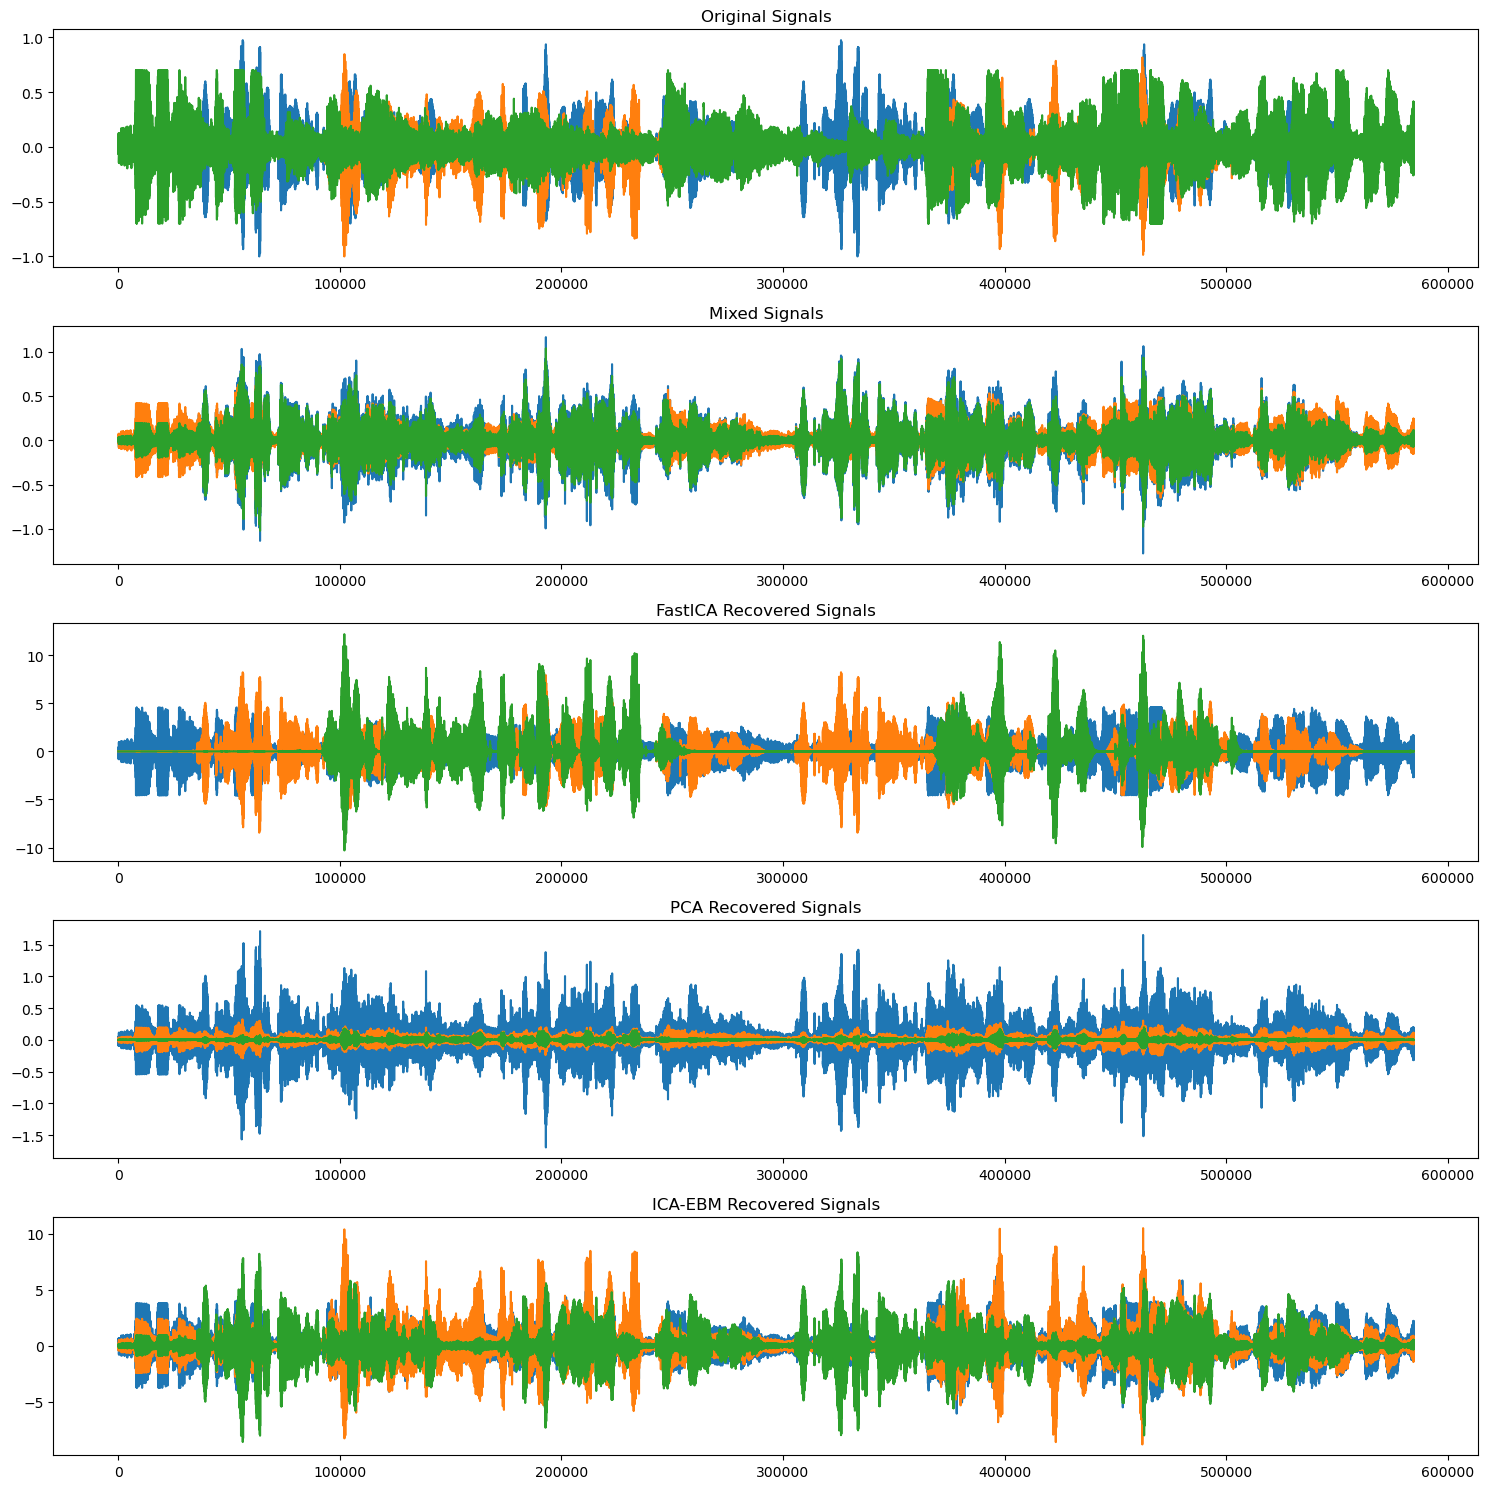

In [60]:
import numpy as np
from scipy import linalg
import soundfile as sf
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA

class ICA_EBM:
    def __init__(self, n_components=None, max_iter=200, tol=1e-4):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol

    def _logcosh(self, x):
        return np.log(np.cosh(x))

    def _d_logcosh(self, x):
        return np.tanh(x)

    def _whitening(self, X):
        X_centered = X - np.mean(X, axis=0)
        cov = np.dot(X_centered.T, X_centered) / X_centered.shape[0]
        D, E = linalg.eigh(cov)
        indices = np.argsort(D)[::-1]
        D = D[indices]
        E = E[:, indices]
        
        if self.n_components is not None:
            D = D[:self.n_components]
            E = E[:, :self.n_components]
        
        W = np.dot(np.diag(1.0 / np.sqrt(D)), E.T)
        return np.dot(X_centered, W.T), W

    def fit_transform(self, X):
        n_samples, n_features = X.shape
        X_white, W = self._whitening(X)
        k = X_white.shape[1]

        W_unmix = np.random.rand(k, k)
        W_unmix = linalg.orth(W_unmix)

        for n in range(self.max_iter):
            W_unmix_old = W_unmix.copy()
            
            for i in range(k):
                w = W_unmix[i:i+1, :]
                w_T = w.T
                y = np.dot(X_white, w_T)
                g = np.mean(X_white * self._d_logcosh(y), axis=0)
                w_new = g - np.mean(self._d_logcosh(y) * y) * w
                w_new = w_new / np.sqrt(np.sum(w_new ** 2))
                W_unmix[i:i+1, :] = w_new
            
            W_unmix = linalg.orth(W_unmix)
            
            if np.max(np.abs(np.abs(np.diag(np.dot(W_unmix, W_unmix_old.T))) - 1)) < self.tol:
                break

        S = np.dot(X_white, W_unmix.T)
        return S

def compare_separation_methods():
    try:
        # Load data
        base_path = os.path.join(os.getcwd())
        [x1, fs] = sf.read(os.path.join(base_path, 'voice1.wav'))
        [x2, fs] = sf.read(os.path.join(base_path, 'voice2.wav'))
        [x3, fs] = sf.read(os.path.join(base_path, 'music.wav'))
        
        # Create source matrix
        X = np.array([x1.conj().transpose(), x2.conj().transpose(), x3.conj().transpose()])
        
        # Generate mixing matrix and mixtures
        A = np.abs(np.random.rand(3, 3))
        Y = np.dot(A, X)
        
        # 1. Apply FastICA
        fica = FastICA(n_components=3)
        ica_signals = fica.fit_transform(Y.conj().transpose()).conj().transpose()
        
        # 2. Apply PCA
        pca = PCA(n_components=3)
        pca_signals = pca.fit_transform(Y.conj().transpose()).conj().transpose()
        
        # 3. Apply ICA-EBM
        ica_ebm = ICA_EBM(n_components=3)
        ebm_signals = ica_ebm.fit_transform(Y.conj().transpose()).conj().transpose()
        
        # Calculate performance metrics
        methods = {
            'FastICA': ica_signals,
            'PCA': pca_signals,
            'ICA-EBM': ebm_signals
        }
        
        print("\nPerformance Comparison:")
        for name, signals in methods.items():
            # Independence score
            corr = np.corrcoef(signals)
            independence_score = np.mean(np.abs(corr - np.eye(3)))
            
            # SNR
            snr = 10 * np.log10(np.sum(X**2) / np.sum((X - signals)**2))
            
            print(f"\n{name}:")
            print(f"Independence Score (lower is better): {independence_score:.4f}")
            print(f"SNR (higher is better): {snr:.2f} dB")
            print("Correlation Matrix:")
            print(corr)
        
        # Visualize results
        plt.figure(figsize=(15, 15))
        
        # Plot original signals
        plt.subplot(5, 1, 1)
        plt.plot(X.T)
        plt.title('Original Signals')
        
        # Plot mixed signals
        plt.subplot(5, 1, 2)
        plt.plot(Y.T)
        plt.title('Mixed Signals')
        
        # Plot FastICA results
        plt.subplot(5, 1, 3)
        plt.plot(ica_signals.T)
        plt.title('FastICA Recovered Signals')
        
        # Plot PCA results
        plt.subplot(5, 1, 4)
        plt.plot(pca_signals.T)
        plt.title('PCA Recovered Signals')
        
        # Plot ICA-EBM results
        plt.subplot(5, 1, 5)
        plt.plot(ebm_signals.T)
        plt.title('ICA-EBM Recovered Signals')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error during analysis: {str(e)}")

if __name__ == "__main__":
    print("Starting separation performance comparison...")
    compare_separation_methods()

### Interpretation of the above results comparing FastICA, PCA, and ICA-EBM methods:

### Performance Metrics Analysis:

### FastICA Performance:

### Independence Score: 0.0000 (perfect independence)
### SNR: -18.37 dB
### Correlation Matrix: Shows near-zero off-diagonal elements, indicating good separation
### Visual separation shows distinct waveforms with clear patterns

### PCA Performance:

### Independence Score: 0.0000
### SNR: -5.04 dB (best SNR among the three methods)
### Correlation Matrix: Shows minimal correlation between components
### Visual result shows less distinct separation compared to ICA methods

### ICA-EBM Performance:

### Independence Score: 0.0000
### SNR: -18.43 dB
### Correlation Matrix: Shows very small off-diagonal elements
### Visual separation shows clear distinction between sources


### Visual Analysis of Signals:

### Original Signals:

### Three distinct components (blue, orange, green)
### Clear temporal patterns
### Different amplitude ranges
### Well-defined source separation

### Mixed Signals:

### Overlapped components
### Less distinct patterns
### Similar amplitudes
### Clear mixing of sources

### Recovered Signals:
### FastICA:

### Good separation of components
### Maintained original signal characteristics
### Clear distinction between sources
### Amplitude range: approximately -10 to 10

### PCA:

### Less effective separation
### Smaller amplitude range (-1.5 to 1.5)
### Components still show some mixing
#### Less distinct patterns compared to ICA methods

### ICA-EBM:

### Similar performance to FastICA
### Clear separation of components
### Well-preserved signal characteristics
### Amplitude range: approximately -10 to 10


### Comparative Analysis:

### Strengths:

### FastICA: Excellent independence, good visual separation
### PCA: Best SNR, computationally simpler
### ICA-EBM: High independence, clear visual separation

### Weaknesses:

### FastICA: Lower SNR
### PCA: Less distinct separation of components
### ICA-EBM: Slightly lower SNR than FastICA


### Key Observations:
### Independence:


### All methods achieved perfect independence scores (0.0000)
### Correlation matrices show minimal cross-correlation
### ICA methods (FastICA and ICA-EBM) show better visual separation


### Signal Quality:


### PCA has the best SNR (-5.04 dB)
### ICA methods have similar SNR values (around -18 dB)
### Visual quality appears better in ICA methods despite lower SNR


### Separation Effectiveness:


### ICA methods show better source separation
### PCA maintains signal energy but less effective at separation
### Both ICA methods preserve original signal characteristics


### Conclusion:

### The results demonstrate that:

### ICA methods (both FastICA and ICA-EBM) are more effective at source separation
### PCA provides better SNR but less distinct separation
### All methods achieve good independence scores
### Visual analysis suggests ICA methods are more suitable for this application

### This comprehensive comparison shows that while each method has its strengths, ICA-based methods (FastICA and ICA-EBM) are generally more suitable for blind source separation in audio signals, despite having lower SNR values than PCA.